# Random Graphs and Degree Centrality

In this notebook, we will explore two different types of random graph generator models namely - the Erdős–Rényi and Barabási–Albert graphs. We will create and plot graphs using the implementation of these models from the NetworkX package. We will also investigate the degree centrality distribution and how it correlates to the attributes of these graphs.

## Imports

In [253]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd

## Erdős–Rényi Graph

[Erdős–Rényi](https://networkx.org/documentation/latest/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html) is one of the models used for generating random graphs with special properties.

There are two closely related variants of Erdős–Rényi:

1. In the $ G_{n,m}$ model, a graph is chosen uniformly at random from the collection of all graphs which have $ n $ nodes and $ m $ edges.


2. In the $ G_{n,p}$ model, a graph with $ n $ nodes is constructed and each edge is included in the graph with probability $p$, independent from every other edge.

In this notebook, we will look into the second type of Erdős–Rényi model.

### Create an Erdős–Rényi graph with 100 nodes and $p$ = 0.3

In [284]:
n = 100                    # number of nodes 
p = 0.3                    # probability p 
seed = 2111                # use of seed for reproducibility
G1 = nx.erdos_renyi_graph(n, p, seed)

### Plotting the graph

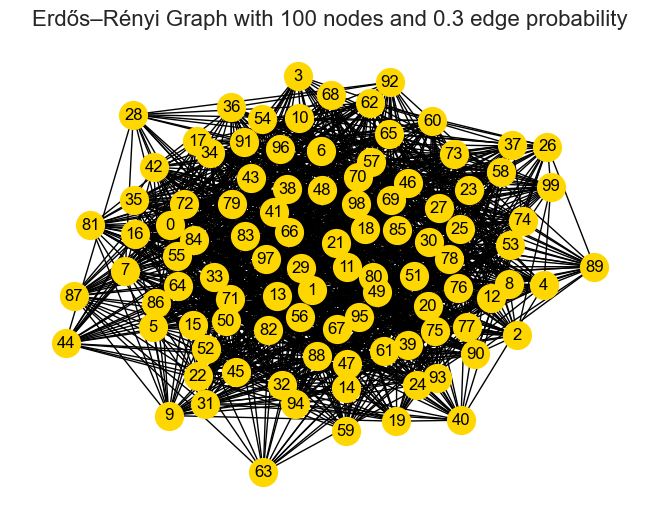

In [285]:
nx.draw(G1, pos=nx.spring_layout(G1, k=0.25,iterations=20), with_labels=True, node_color = "gold", node_size = 400)
plt.title("Erdős–Rényi Graph with 100 nodes and 0.3 edge probability")
plt.show()

Since the number of nodes and edge probability are both significantly high, the graph is very dense and it is hard to make out the individual edges.

Now, let's talk about degree centrality.

## Degree Centrality

[Degree Centrality](https://networkx.org/documentation/latest/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality) is a simple centrality measure that counts how many neighbors a node has.

If the network is directed, we have two versions of the measure:

1. __in-degree__ is the number of in-coming links, or the number of predecessor nodes


2. __out-degree__ is the number of out-going links, or the number of successor nodes

A node is important if it has many neighbors, or, in the directed case, if there are many other nodes that link to it, or if it links to many other nodes.

### Plotting a histogram of Degree Centrality distribution of G1

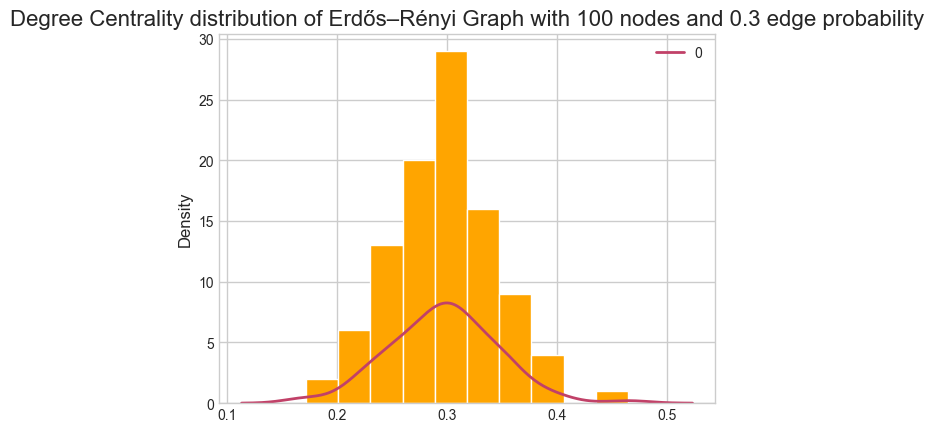

In [229]:
plt.hist(nx.degree_centrality(G1).values(), edgecolor = 'white', color = 'orange')
plt.style.use('seaborn-v0_8-whitegrid')
plt.title("Degree Centrality distribution of Erdős–Rényi Graph with 100 nodes and 0.3 edge probability")
sns.kdeplot(nx.degree_centrality(G1).values(), palette="flare")
plt.show()

We observe that the distribution is centred around 0.3, that is because we took the edge probability as 0.3. The distribution bears similarity to a binomial distribution as evident from the line plot.

Let's change the value of $ p $ and see what happens to the degree centrality distribution.

In [237]:
n2 = 100                    # number of nodes 
p2 = 0.6                    # probability p
seed2 = 200                 # use of seed for reproducibility
G2 = nx.erdos_renyi_graph(n2, p2, seed2)

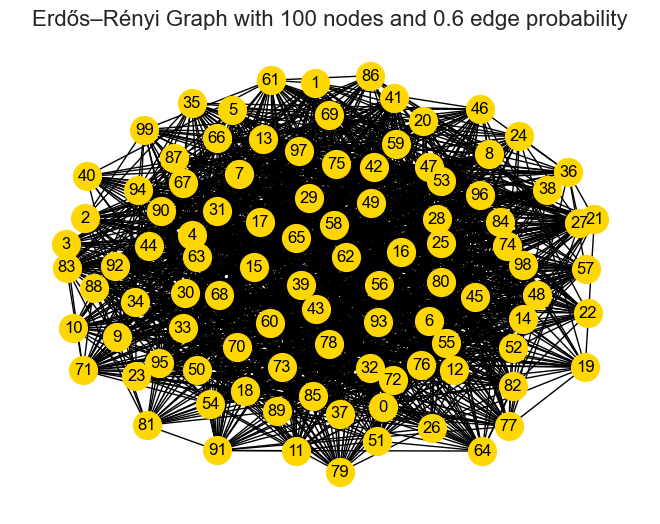

In [239]:
nx.draw(G1, pos=nx.spring_layout(G2, k=0.25, iterations=20), with_labels=True, node_color = "gold", node_size = 400)
plt.title("Erdős–Rényi Graph with 100 nodes and 0.6 edge probability")
plt.show()

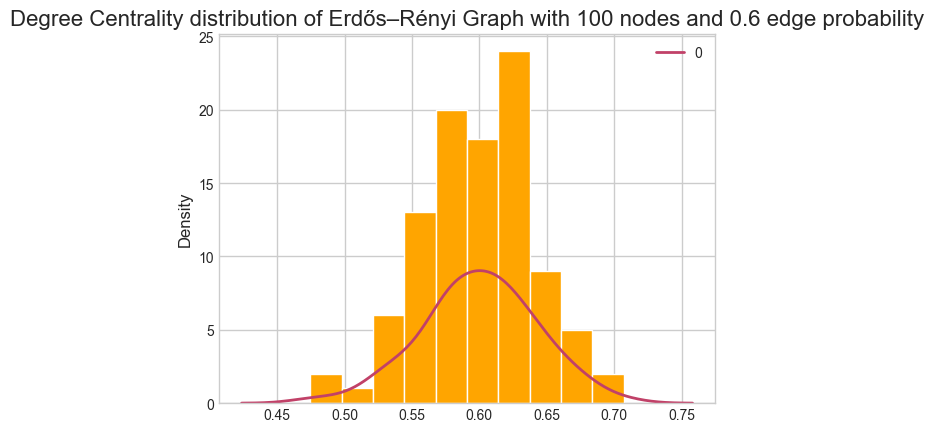

In [249]:
plt.hist(nx.degree_centrality(G2).values(), edgecolor = 'white', color = 'orange')
plt.style.use('seaborn-v0_8-whitegrid')
plt.title("Degree Centrality distribution of Erdős–Rényi Graph with 100 nodes and 0.6 edge probability")
sns.kdeplot(nx.degree_centrality(G2).values(), palette="flare")
plt.show()

Again, it can be observed from the histogram above that the distribution is binomial but it is now centred around 0.6, which is the probability $ p $ with which an edge exists in the graph G2.

### Comparing the Degree Centrality graphs of G1 and G2

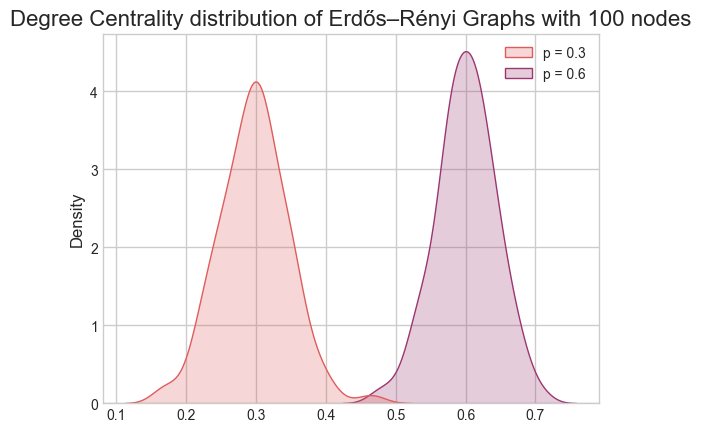

In [259]:
plt.style.use('seaborn-v0_8-whitegrid')

df = pd.DataFrame()
df["p = 0.3"] = nx.degree_centrality(G1).values()
df["p = 0.6"] = nx.degree_centrality(G2).values()
sns.kdeplot(df, palette="flare", fill=True)

plt.title("Degree Centrality distribution of Erdős–Rényi Graphs with 100 nodes")
plt.show()

Thus, we can conclude that the Erdős–Rényi model produces graphs that have binomial distribution as their degree centrality distribution. We see that as we increase the edge probability $ p $, the centre of the distribution also shifts forward.

The number of edges in the overall graph increases and thus the graph becomes more dense.

## Barabási–Albert Graph

The [Barabási–Albert](https://networkx.org/documentation/latest/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html) model is used for generating random __scale-free__ networks using a __preferential attachment__ mechanism.

A Scale-Free network is one in which the distribution of links to nodes follow a power law i.e. the vast majority of nodes have very few connections, while a few important nodes (called Hubs) have a large number of connections.

Preferential attachment means that the more connected a node is, the more likely it is to receive new links.

### Create an Barabási–Albert graph with 100 nodes and $m$ = 3

In [278]:
n = 100                    # number of nodes
m = 3                      # number of edges to attach from a new node to existing nodes
seed = 30421               # use of seed for reproducibility
G3 = nx.barabasi_albert_graph(n, m, seed)

### Plotting the graph

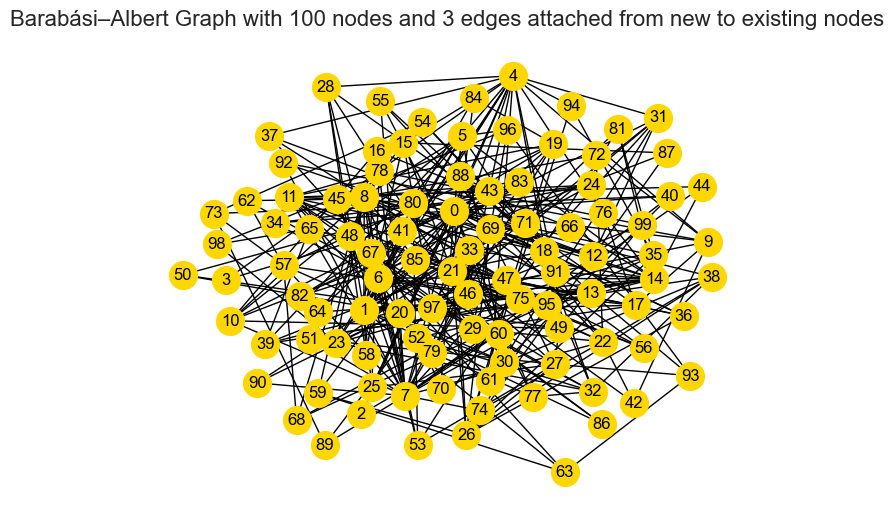

In [279]:
nx.draw(G3, pos=nx.spring_layout(G1, k=0.25,iterations=20), with_labels=True, node_color = "gold", node_size = 400)
plt.title("Barabási–Albert Graph with 100 nodes and 3 edges attached from new to existing nodes")
plt.show()

Now, let us plot the degree centrality distribution of the above graph

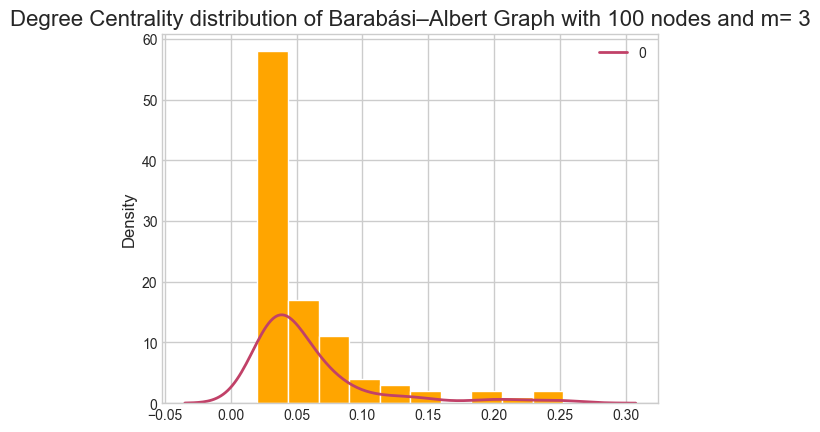

In [282]:
plt.hist(nx.degree_centrality(G3).values(), edgecolor = 'white', color = 'orange')
plt.style.use('seaborn-v0_8-whitegrid')
plt.title("Degree Centrality distribution of Barabási–Albert Graph with 100 nodes and m= 3")
sns.kdeplot(nx.degree_centrality(G3).values(), palette="flare")
plt.show()

We can observe from the graph that the degree centrality distribution of the Barabási–Albert graph follows some sort of power law. Specifically, it is a power law of the form $ P(k) $ = $k$ <sup>$-3$</sup>.

## Final Inference

The degree centrality distribution of the Erdős–Rényi graph and Barabási–Albert graph demonstrate some interesting differences between the behaviour of these two models in terms of generating random graphs.

- __Power-law distribution__: The degree centrality distribution of a Barabási–Albert graph typically follows a power-law distribution, which means that a few nodes have a very high degree centrality, while the majority of nodes have a low degree centrality. In contrast, the degree centrality distribution of an ER graph typically follows a normal distribution.


- __Clustering coefficient__: The clustering coefficient of a node in a graph is a measure of the extent to which the node's neighbors are connected to each other. In a Barabási–Albert graph, the clustering coefficient tends to be high, meaning that nodes tend to be connected to other nodes that are also connected to each other. In an Erdős–Rényi graph, the clustering coefficient tends to be low, meaning that nodes tend to be connected to other nodes that are not connected to each other.


- __Small-world phenomenon__: Both graphs can exhibit the small-world phenomenon, which means that the average shortest path length between two nodes is small, even though the graph may have a large number of nodes. However, Barabási–Albert graphs tend to have a higher clustering coefficient, which means that the small-world phenomenon is more pronounced in them.

## Applications of these models

Erdős–Rényi networks are important in the network theory as they serve well as a benchmark tools i.e. if certain property can exist on this network, then it might be so that the property arises purely at random and is not observed due to a more sophisticated reasons. It is also worthwhile to note that this network formation model is somewhat related to the percolation theory.

Several natural and human-made systems, including the Internet, the World Wide Web, citation networks, and some social networks are thought to be approximately scale-free and certainly contain few nodes (called hubs) with unusually high degree as compared to the other nodes of the network. The Barabási–Albert model tries to explain the existence of such nodes in real networks.

## References

1. https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model
2. https://www.sci.unich.it/~francesc/teaching/network/degree.html
3. https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model
4. https://en.wikipedia.org/wiki/Scale-free_network
5. https://en.wikipedia.org/wiki/Preferential_attachment
6. https://rf.mokslasplius.lt/erdos-renyi-model/